# Import Libraries

In [1]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import scipy.stats as st
import sklearn.datasets as dta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler




# Load Dataset
This dataset features real estate listings across the United States, categorized by state and zip code. The original dataset, sourced from Kaggle, contained 2.2 million entries. We narrowed down the data by focusing exclusively on properties in Texas, resulting in a reduced dataset with 12 columns and 40,111 rows.


In [2]:
# Load the dataset into a pandas DataFrame

Real_Estate_data_df = pd.read_csv('USA Real Estate Dataset new.csv')


In [3]:
Real_Estate_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,33968.0,for_sale,99000.0,1.0,1.0,5.0,49388.0,Terlingua,Texas,79852,600.0,NaN
1,88188.0,for_sale,58800.0,NaN,NaN,1.0,841041.0,Orange,Texas,77632,NaN,NaN
2,88188.0,for_sale,58800.0,NaN,NaN,1.0,844563.0,Orange,Texas,77632,NaN,NaN
3,88188.0,for_sale,58800.0,NaN,NaN,1.0,845421.0,Orange,Texas,77632,NaN,NaN
4,88188.0,for_sale,58800.0,NaN,NaN,1.0,859147.0,Orange,Texas,77632,NaN,NaN


# Data Exploration and Cleaning

In the data exploration phase, we thoroughly examined the dataset to understand its structure, variable types, and key statistics. We utilized visualizations like histograms and scatter plots to identify patterns, relationships, and outliers in the data.

For data cleaning, we addressed missing values, removed duplicates, and ensured correct data types for each column. We also drop the columns we dont need for data analysis. The cleaned dataset was then validated and prepared for further analysis or modeling.

In [4]:
Real_Estate_data_df.shape

(40111, 12)

In [5]:
# Display the basic information of the dataframe
print(Real_Estate_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40111 entries, 0 to 40110
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     40093 non-null  float64
 1   status          40111 non-null  object 
 2   price           40053 non-null  float64
 3   bed             28761 non-null  float64
 4   bath            27158 non-null  float64
 5   acre_lot        36224 non-null  float64
 6   street          40004 non-null  float64
 7   city            40094 non-null  object 
 8   state           40111 non-null  object 
 9   zip_code        40111 non-null  int64  
 10  house_size      28903 non-null  float64
 11  prev_sold_date  15315 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB
None


In [6]:
# summary statistics
print(Real_Estate_data_df.describe())

         brokered_by         price           bed          bath      acre_lot  \
count   40093.000000  4.005300e+04  28761.000000  27158.000000  36224.000000   
mean    52715.409997  4.856361e+05      3.476931      2.678548     11.630184   
std     29786.509676  8.704503e+05      1.337864      1.212267    106.481943   
min        51.000000  0.000000e+00      1.000000      1.000000      0.000000   
25%     26918.000000  1.800000e+05      3.000000      2.000000      0.170000   
50%     52410.000000  3.400000e+05      3.000000      2.000000      0.340000   
75%     78031.000000  5.199000e+05      4.000000      3.000000      2.010000   
max    110142.000000  3.468000e+07     99.000000     25.000000   7085.560000   

             street      zip_code    house_size  
count  4.000400e+04  40111.000000  28903.000000  
mean   1.060828e+06  75815.313355   2314.157354  
std    6.059690e+05    772.033707   1379.643195  
min    2.300000e+01  11111.000000    100.000000  
25%    5.323715e+05  75206.00

In [7]:
Real_Estate_data_df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code            int64
house_size        float64
prev_sold_date     object
dtype: object

In [8]:
# Check the value counts
print(Real_Estate_data_df['status'].value_counts())

status
for_sale          38497
ready_to_build     1614
Name: count, dtype: int64


In [9]:
# checking for missing values
print(Real_Estate_data_df.isnull().sum())

brokered_by          18
status                0
price                58
bed               11350
bath              12953
acre_lot           3887
street              107
city                 17
state                 0
zip_code              0
house_size        11208
prev_sold_date    24796
dtype: int64


In [10]:
# Checking for duplicates
print(Real_Estate_data_df.duplicated().sum())

0


In [11]:
# Convert prev_sold_date to datetime
Real_Estate_data_df['prev_sold_date'] = pd.to_datetime(Real_Estate_data_df['prev_sold_date'])

In [12]:
# dropping missing values
Clean_data_df = Real_Estate_data_df.dropna()

In [13]:
Clean_data_df=Clean_data_df.drop(columns=['brokered_by', 'street'])

In [14]:
# Verifying that there no more missing datas
print(Clean_data_df.isnull().sum())

status            0
price             0
bed               0
bath              0
acre_lot          0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [15]:
# Verifying changes
Clean_data_df.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
18,for_sale,349000.0,6.0,5.0,4.41,Newton,Texas,75966,5888.0,2014-06-17
19,for_sale,249500.0,2.0,2.0,1.19,Hemphill,Texas,75948,1872.0,2022-04-28
23,for_sale,479000.0,5.0,4.0,6.28,Newton,Texas,75966,4248.0,2022-05-06
27,for_sale,179900.0,3.0,2.0,2.23,Burkeville,Texas,75932,1240.0,2022-01-28
28,for_sale,134900.0,4.0,2.0,0.29,Newton,Texas,75966,2010.0,2021-07-29


c:\Users\sheve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


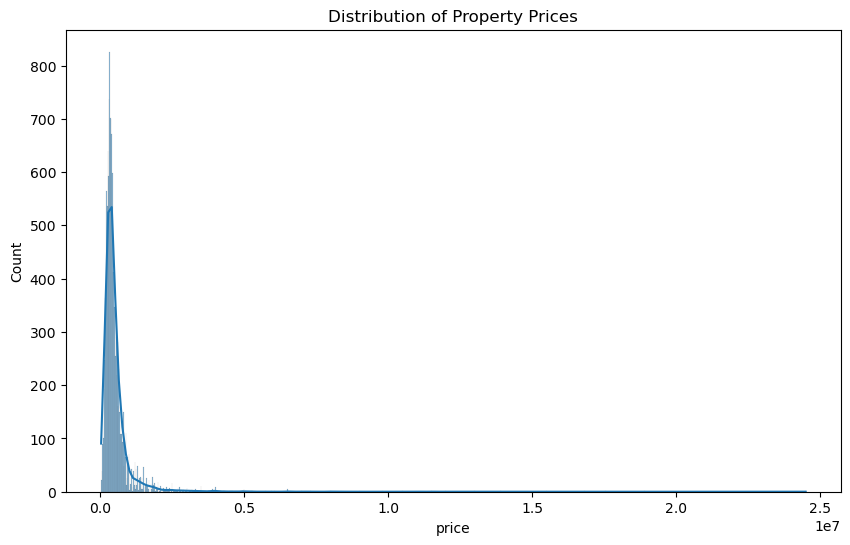

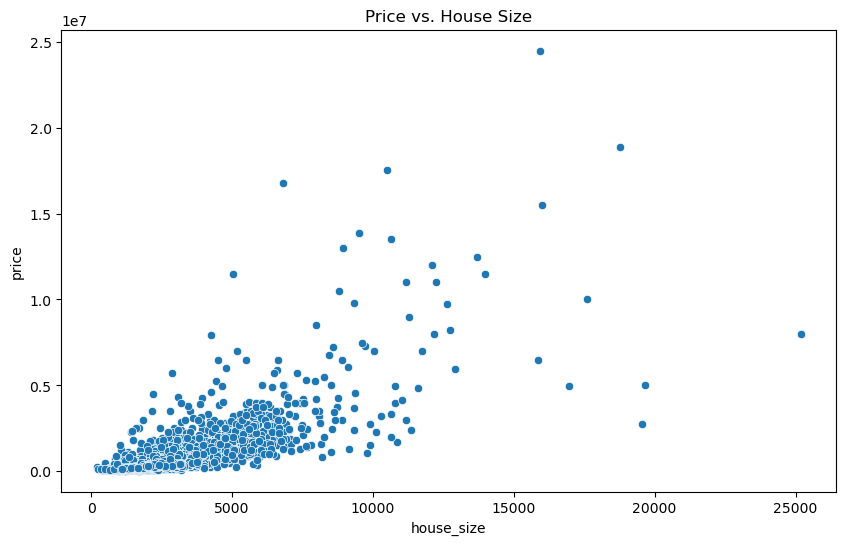

In [16]:
import seaborn as sns

# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(Clean_data_df['price'], kde=True)
plt.title('Distribution of Property Prices')
plt.show()

# Scatter plot of price vs. house size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_size', y='price', data=Clean_data_df)
plt.title('Price vs. House Size')
plt.show()

### Histogram of Prices
**Most properties are low to moderately priced:** The sharp peak at the lower end suggests that the majority of the properties in the dataset are within a more affordable price range.

**Few high-priced properties:** The long tail on the right indicates that there are some very high-priced properties, but they are rare compared to the lower-priced ones.

### Scatter plot of Price vs. House Size
**Positive Correlation:** Generally, there is a positive correlation between house size and price. This means that as the house size increases, the price tends to increase as well. This is evident from the upward trend where larger houses generally correspond to higher prices.

**Cluster of Points:** Most of the data points are clustered in the lower range of both house size (under 5,000 square feet) and price (under $500,000). This suggests that the majority of properties in the dataset are relatively smaller homes with lower prices.

**Outliers:** There are several points scattered far away from the main cluster, especially at higher house sizes and prices. These represent large, luxury properties that are much more expensive than the average. Some outliers are particularly notable for having high prices even with a relatively smaller house size, or very large house sizes with prices that may seem disproportionately high or low compared to the main trend.




# Data Transformation

1. Feature Engineering:
We create a new features that could capture important relationships: 
* We calculate the age of the house since it was last sold
* Calculate the Price per square foot
* Calculate the average house value per zip code
* Convert categorical variables: Convert city, state, and zip_code into numerical values using label encoding.


In [17]:

transform_data_df = Clean_data_df.copy()

# Calculate the age of the house since it was last sold
transform_data_df['house_age_since_sold'] = (pd.to_datetime('2024-08-30') - transform_data_df['prev_sold_date']).dt.days

# Calculate the Price per square foot
transform_data_df['price_per_sqft'] = transform_data_df['price'] / transform_data_df['house_size']

# Calculate the average house value per zip code
average_house_value_per_zipcode = transform_data_df.groupby('zip_code')['price'].mean().reset_index()

# Rename the column to be more descriptive
average_house_value_per_zipcode.rename(columns={'price': 'average_house_value_per_zipcode'}, inplace=True)

# Merge the average house value per zip code back to the original DataFrame
transform_data_df = transform_data_df.merge(average_house_value_per_zipcode, on='zip_code', how='left')

# Pad prices to 6 digits with leading zeros
transform_data_df['average_house_value_per_zipcode'] = transform_data_df['average_house_value_per_zipcode'].apply(lambda x: f"{int(x):06d}")
transform_data_df['price_per_sqft'] = transform_data_df['price_per_sqft'].apply(lambda x: f"{int(x):06d}")
transform_data_df['price'] = transform_data_df['price'].apply(lambda x: f"{int(x):06d}")

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert categorical variables:
#Convert city, state, and zip_code into numerical values using label encoding.
transform_data_df['city'] = label_encoder.fit_transform(transform_data_df['city'])
transform_data_df['state'] = label_encoder.fit_transform(transform_data_df['state'])
transform_data_df['zip_code'] = label_encoder.fit_transform(transform_data_df['zip_code'])
transform_data_df['status'] = label_encoder.fit_transform(transform_data_df['status'])

transform_data_df.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,0,349000,6.0,5.0,4.41,311,0,326,5888.0,2014-06-17,3727,000059,237580
1,0,249500,2.0,2.0,1.19,194,0,317,1872.0,2022-04-28,855,000133,280742
2,0,479000,5.0,4.0,6.28,311,0,326,4248.0,2022-05-06,847,000112,237580
3,0,179900,3.0,2.0,2.23,58,0,309,1240.0,2022-01-28,945,000145,244966
4,0,134900,4.0,2.0,0.29,311,0,326,2010.0,2021-07-29,1128,000067,237580


**At this Point each teams has to make 1 Training & Model & Prediction of their choice**

# Rebecca

# Natalie

# Russel

# Michael

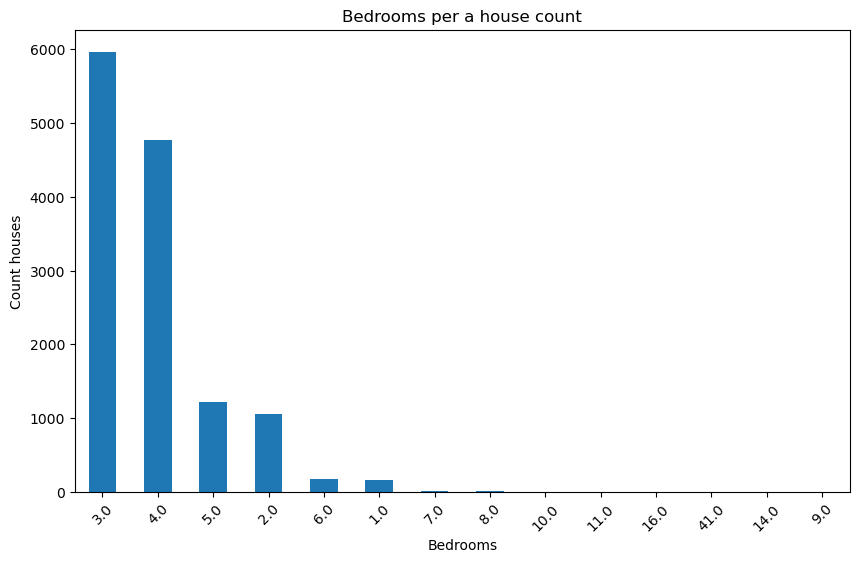

In [18]:
# Count of home bedrooms

BedroomCount = transform_data_df['bed'].value_counts()

plt.figure(figsize=(10, 6))
BedroomCount.plot(kind='bar')
plt.title('Bedrooms per a house count')
plt.xlabel('Bedrooms')
plt.ylabel('Count houses')
plt.xticks(rotation=45)
plt.show()

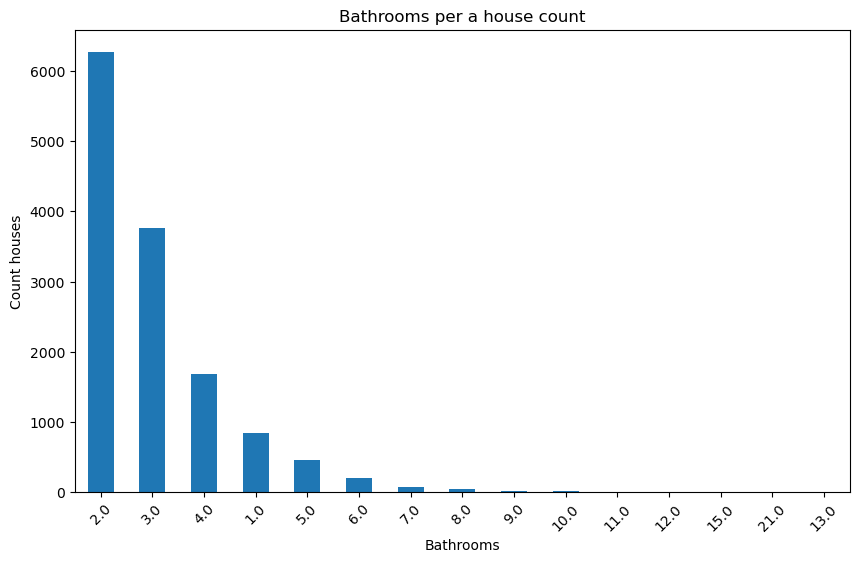

In [19]:
# Count of homes bathrooms

BathroomCount = transform_data_df['bath'].value_counts()

plt.figure(figsize=(10, 6))
BathroomCount.plot(kind='bar')
plt.title('Bathrooms per a house count')
plt.xlabel('Bathrooms')
plt.ylabel('Count houses')
plt.xticks(rotation=45)
plt.show()

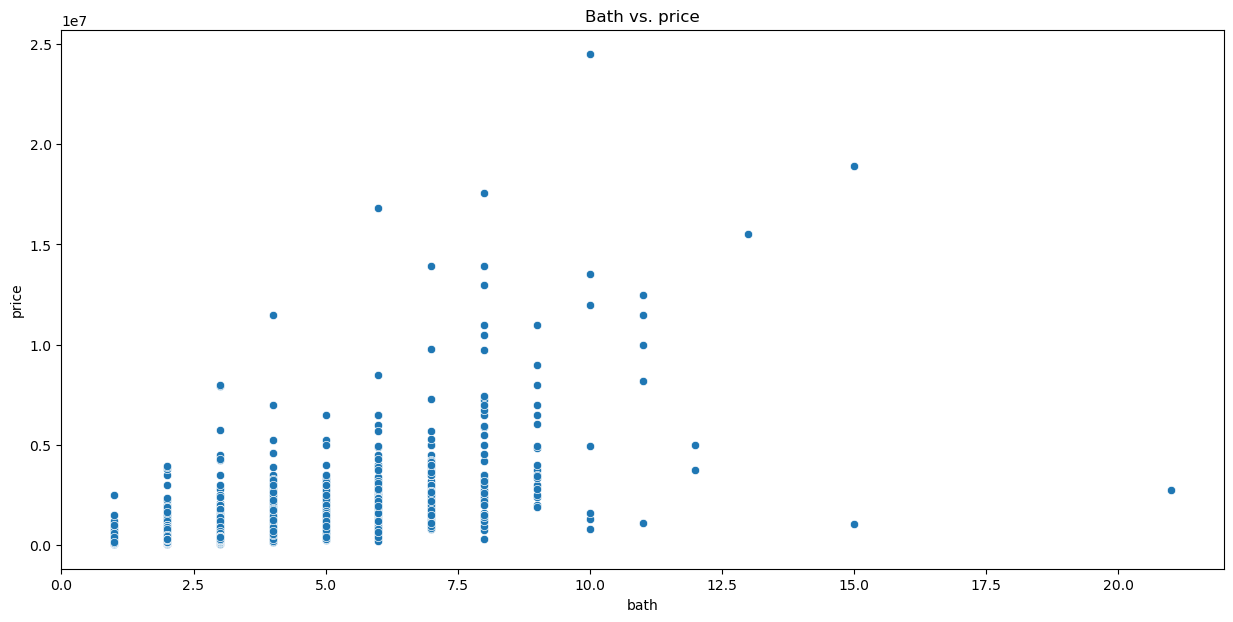

In [20]:
# Scatter plot of price vs. house size
plt.figure(figsize=(15, 7))
sns.scatterplot(x='bath', y='price', data=Clean_data_df)
plt.title('Bath vs. price')
plt.show()

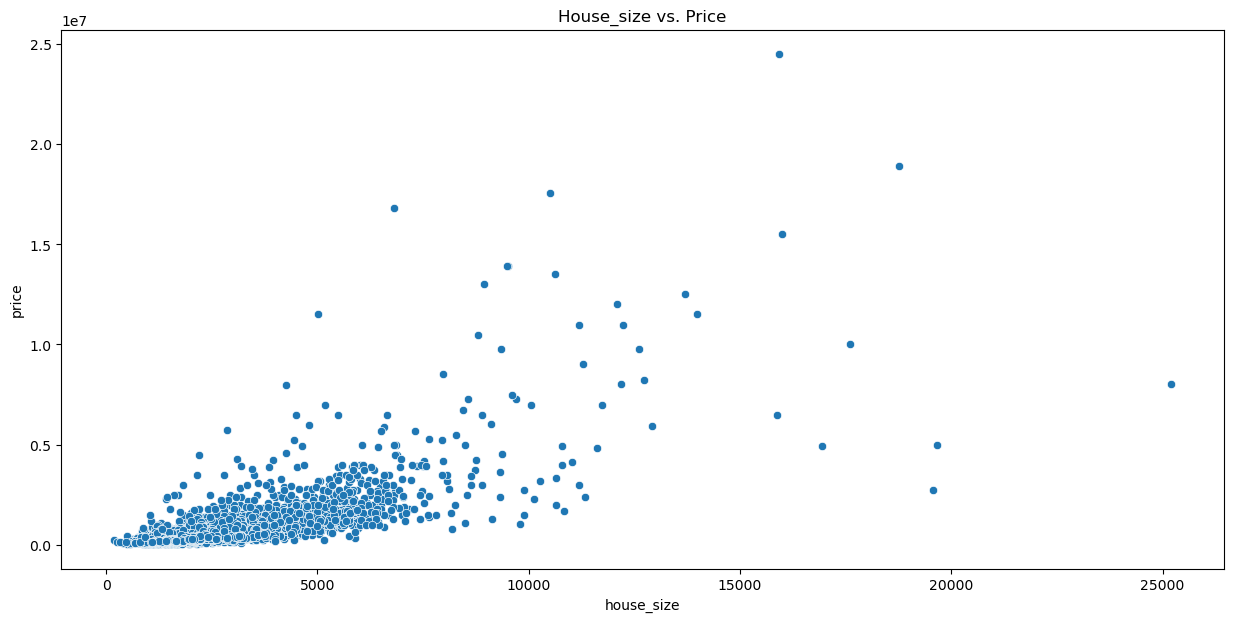

In [21]:
# Scatter plot of price vs. house size
plt.figure(figsize=(15, 7))
sns.scatterplot(x='house_size', y='price', data=Clean_data_df)
plt.title('House_size vs. Price')
plt.show()

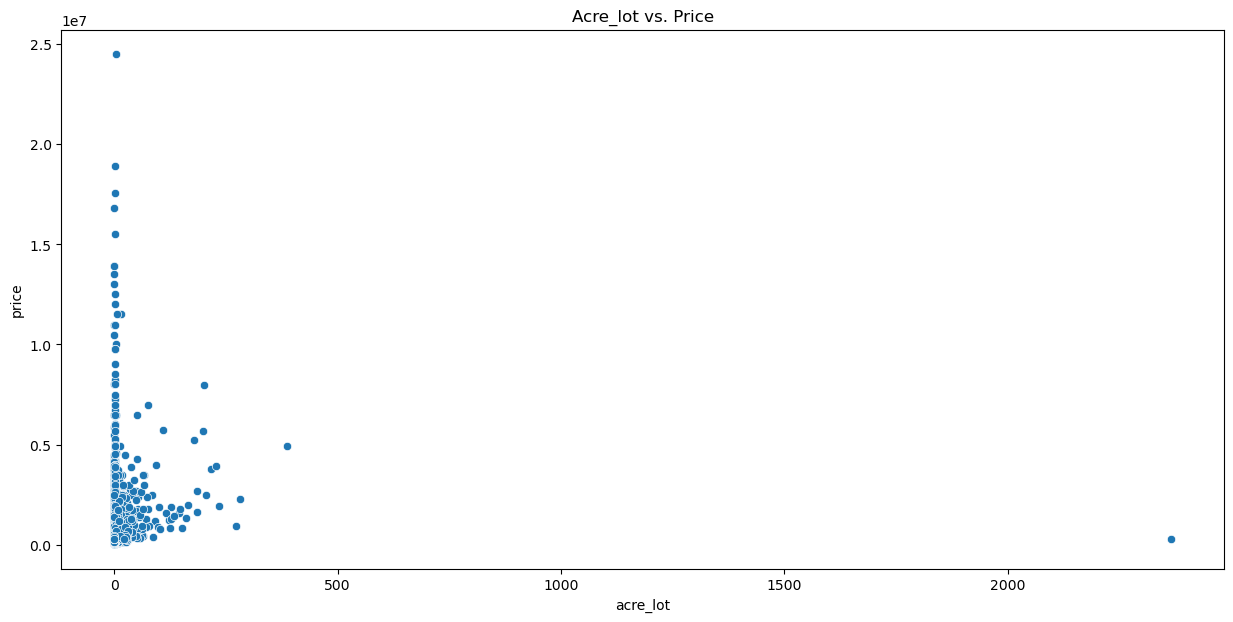

In [22]:
# Scatter plot of Acre_lot vs. house size
plt.figure(figsize=(15, 7))
sns.scatterplot(x='acre_lot', y='price', data=Clean_data_df)
plt.title('Acre_lot vs. Price')
plt.show()

In [23]:
Clean_data_df

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
18,for_sale,349000.0,6.0,5.0,4.41,Newton,Texas,75966,5888.0,2014-06-17
19,for_sale,249500.0,2.0,2.0,1.19,Hemphill,Texas,75948,1872.0,2022-04-28
23,for_sale,479000.0,5.0,4.0,6.28,Newton,Texas,75966,4248.0,2022-05-06
27,for_sale,179900.0,3.0,2.0,2.23,Burkeville,Texas,75932,1240.0,2022-01-28
28,for_sale,134900.0,4.0,2.0,0.29,Newton,Texas,75966,2010.0,2021-07-29
...,...,...,...,...,...,...,...,...,...,...
40082,for_sale,325000.0,4.0,3.0,0.30,Harker Heights,Texas,76548,2864.0,2015-05-01
40083,for_sale,305900.0,4.0,3.0,0.18,Harker Heights,Texas,76548,2604.0,2008-01-04
40084,for_sale,380000.0,4.0,3.0,0.38,Harker Heights,Texas,76548,2411.0,2020-06-16
40086,for_sale,303000.0,4.0,2.0,0.24,Harker Heights,Texas,76548,2089.0,2017-07-27


In [24]:
numeric_columns = Clean_data_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)



               price       bed      bath  acre_lot  zip_code  house_size
price       1.000000  0.329894  0.597599  0.076071 -0.072770    0.712028
bed         0.329894  1.000000  0.651501 -0.003562 -0.046945    0.645830
bath        0.597599  0.651501  1.000000  0.018197 -0.092010    0.847502
acre_lot    0.076071 -0.003562  0.018197  1.000000  0.017880    0.024196
zip_code   -0.072770 -0.046945 -0.092010  0.017880  1.000000   -0.080347
house_size  0.712028  0.645830  0.847502  0.024196 -0.080347    1.000000


In [25]:
#Support Vector Machine Model(SVM)

In [26]:
Clean_data_df

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
18,for_sale,349000.0,6.0,5.0,4.41,Newton,Texas,75966,5888.0,2014-06-17
19,for_sale,249500.0,2.0,2.0,1.19,Hemphill,Texas,75948,1872.0,2022-04-28
23,for_sale,479000.0,5.0,4.0,6.28,Newton,Texas,75966,4248.0,2022-05-06
27,for_sale,179900.0,3.0,2.0,2.23,Burkeville,Texas,75932,1240.0,2022-01-28
28,for_sale,134900.0,4.0,2.0,0.29,Newton,Texas,75966,2010.0,2021-07-29
...,...,...,...,...,...,...,...,...,...,...
40082,for_sale,325000.0,4.0,3.0,0.30,Harker Heights,Texas,76548,2864.0,2015-05-01
40083,for_sale,305900.0,4.0,3.0,0.18,Harker Heights,Texas,76548,2604.0,2008-01-04
40084,for_sale,380000.0,4.0,3.0,0.38,Harker Heights,Texas,76548,2411.0,2020-06-16
40086,for_sale,303000.0,4.0,2.0,0.24,Harker Heights,Texas,76548,2089.0,2017-07-27


In [27]:
columns_to_drop = ["prev_sold_date", "city", "state"]
transform_data_df = transform_data_df.drop(columns=columns_to_drop, axis=1)

In [28]:
# Get the target variable (the "price column)

y = transform_data_df["price"]

In [40]:
# Get the features (everything except the "price" and "status" column)

X =transform_data_df.copy()
X = transform_data_df.drop(columns=["price", "status"])
X.head()



,bed,bath,acre_lot,zip_code,house_size,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,6.0,5.0,4.41,326,5888.0,3727,000059,237580
1,2.0,2.0,1.19,317,1872.0,855,000133,280742
2,5.0,4.0,6.28,326,4248.0,847,000112,237580
3,3.0,2.0,2.23,309,1240.0,945,000145,244966
4,4.0,2.0,0.29,326,2010.0,1128,000067,237580


In [41]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
# Create the support vector machine classifier model with a 'linear' kernel
model = SVC(kernel='linear')

In [32]:
# Fit the model to the training data
#model.fit(X_train, y_train)

In [33]:
#Model

In [34]:
transform_data_df.select_dtypes(include=['float64', 'int64'])

,bed,bath,acre_lot,zip_code,house_size,house_age_since_sold
0,6.0,5.0,4.41,326,5888.0,3727
1,2.0,2.0,1.19,317,1872.0,855
2,5.0,4.0,6.28,326,4248.0,847
3,3.0,2.0,2.23,309,1240.0,945
4,4.0,2.0,0.29,326,2010.0,1128
...,...,...,...,...,...,...
13358,4.0,3.0,0.30,511,2864.0,3409
13359,4.0,3.0,0.18,511,2604.0,6083
13360,4.0,3.0,0.38,511,2411.0,1536
13361,4.0,2.0,0.24,511,2089.0,2591


In [35]:
transform_data_df.dtypes

status                               int32
price                               object
bed                                float64
bath                               float64
acre_lot                           float64
zip_code                             int64
house_size                         float64
house_age_since_sold                 int64
price_per_sqft                      object
average_house_value_per_zipcode     object
dtype: object

In [36]:

X = transform_data_df.drop(columns=['price'])
y = transform_data_df['price']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [37]:
classifier = RandomForestClassifier(random_state=13)

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

# Calculate the accuracy of the model on the testing data
classifier.score(X_test, y_test)



MemoryError: could not allocate 244580352 bytes

# Lerma